In [1]:
from Annau2023.models import generator, critic
from Annau2023.SRModel import SRModelData, SuperResolver
from Annau2023.RAPSD import compute_rapsd

import torch
import torch.utils.data as data_utils

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 14,
    'mathtext.default': 'regular',
    'text.latex.preamble': r'\usepackage{mathrsfs}',
    'pdf.fonttype': 42
})


In [2]:
data_path  = "/workspace/Annau2023/data/nfs_pfs/"

model_list = {
    r"(\alpha = 500)":[
        SRModelData(region="west", sr_model_name="L_13", exp_id="2e78fba6814545f0be62896cd14b031f", data_path=data_path),
        SRModelData(region="west", sr_model_name="L_9", exp_id="ad5772150e7547ee8d14aa7bac192f54", data_path=data_path),
        SRModelData(region="west", sr_model_name="L_5", exp_id="c5c5e0e8aad5411783329f31db91ff78", data_path=data_path),
        SRModelData(region="west", sr_model_name="NFS", exp_id="db9f0fae83c949eaad5d1176a43dae47",data_path=data_path),

        SRModelData(region="southeast", sr_model_name="L_13", exp_id="3d2ea1e5f805454ea485a3a7c783fd5a", data_path=data_path),
        SRModelData(region="southeast", sr_model_name="L_9", exp_id="caf7f501306848f8bc746605c4994e31", data_path=data_path),
        SRModelData(region="southeast", sr_model_name="L_5", exp_id="90375b9266eb442cb15073895e14d691", data_path=data_path),
        SRModelData(region="southeast", sr_model_name="NFS", exp_id="feda42500d2b45549be96f1bf62b0b03",data_path=data_path),

        SRModelData(region="central", sr_model_name="L_13", exp_id="c5154f8f03c74cba924d789357e5ca84", data_path=data_path),
        SRModelData(region="central", sr_model_name="L_9", exp_id="e54c953370974e2db09a37e9c0c7cdb5", data_path=data_path),
        SRModelData(region="central", sr_model_name="L_5", exp_id="1570ac86f8e94e83b85447618ca576f5", data_path=data_path),
        SRModelData(region="central", sr_model_name="NFS", exp_id="0c5ee480663f4f9eb7200f8879aa1244", data_path=data_path),
    ],
    r"(\alpha = 50)":[
        SRModelData(region="southeast", sr_model_name="L_13", exp_id="5c9745ff961e46f9af206d36b6567fae", data_path=data_path),
        SRModelData(region="southeast", sr_model_name="L_9", exp_id="3858c673c9344e7caf24144335981752", data_path=data_path),
        SRModelData(region="southeast", sr_model_name="L_5", exp_id="328e5221158147a9ba9b41ab2ac385c7", data_path=data_path),
        SRModelData(region="southeast", sr_model_name="NFS", exp_id="feda42500d2b45549be96f1bf62b0b03",data_path=data_path),

        SRModelData(region="central", sr_model_name="L_13", exp_id="eedf0cd864204866b98e5de5e710f9c3", data_path=data_path),
        SRModelData(region="central", sr_model_name="L_9", exp_id="1d568d304d7546f78c57e98ff1366b9d", data_path=data_path),
        SRModelData(region="central", sr_model_name="L_5", exp_id="9400ee7db2004aa3b03e91ff710061eb", data_path=data_path),
        SRModelData(region="central", sr_model_name="NFS", exp_id="0c5ee480663f4f9eb7200f8879aa1244",data_path=data_path),

        SRModelData(region="west", sr_model_name="L_13", exp_id="faa34028b516487185c994f48621050a", data_path=data_path),
        SRModelData(region="west", sr_model_name="L_9", exp_id="2faf762448b54ae2b96234d6c77c38b3", data_path=data_path),
        SRModelData(region="west", sr_model_name="L_5", exp_id="4f0574ec4f7147f1b0555cafeb1cc98f", data_path=data_path),
        SRModelData(region="west", sr_model_name="NFS", exp_id="db9f0fae83c949eaad5d1176a43dae47",data_path=data_path),
    ]
}

In [3]:
pfs_gan_spectra = {}
for alpha in model_list:
    rapsd = {"southeast":{}, "central":{}, "west":{}}
    for model in model_list[alpha]:
        lr, hr = model.load_test()
        generator = model.load_generator()
        sr = SuperResolver(region=model.region, lr=lr.float(), hr=hr.float(), G=generator, batch_size=1024)
        rapsd[model.region][model.sr_model_name] = compute_rapsd(sr.super_resolve())
        rapsd[model.region]["ground_truth"] = compute_rapsd(sr.ground_truth())

    pfs_gan_spectra[alpha] = rapsd

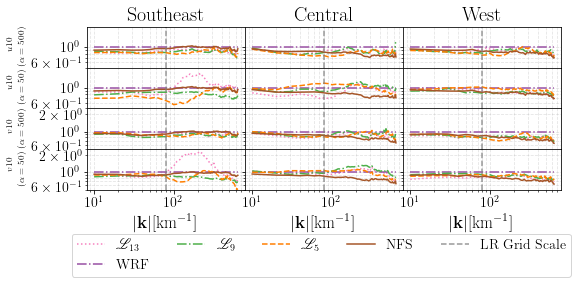

In [7]:
markermap = {
    "CNN": "-",
    "L_5": "--",
    "L_9": "-.",
    "L_13": ":",
    "NFS": "-",
    "ground_truth": "-."
}

colormap = {
    "CNN": "#377eb8",
    "L_5": "#ff7f00",
    "L_9": "#4daf4a",
    "L_13": "#f781bf",
    "NFS": "#a65628",
    "ground_truth": "#984ea3"
}

titlemap = {
    "CNN": "CNN",
    "L_5": r"$\mathscr{L}_5$",
    "L_9": r"$\mathscr{L}_9$",
    "L_13": r"$\mathscr{L}_{13}$",
    "NFS": "NFS",
    "ground_truth": "WRF"
}

var_ref = {"u10": 0, "v10": 1}

# Dear reader:
# “Flat is better than nested” — The Zen of Python*
# *Except while plotting tricky multipanel plots :(

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8.5, 3), sharey='row', sharex='col')
for a, alpha in enumerate(pfs_gan_spectra):
    for j, region in enumerate(pfs_gan_spectra[alpha]):
        for sr_model_name in pfs_gan_spectra[alpha][region]:
            k = pfs_gan_spectra[alpha][region][sr_model_name]["k"]
            for v, var in enumerate(var_ref):
                rownum = 2*v+a
                if rownum < 2:
                    ymin, ymax = 0.5, 1.98
                if rownum >= 2:
                    ymin, ymax = 0.5, 2.5
                axes[rownum, j].loglog(
                    10*k,
                    pfs_gan_spectra[alpha][region][sr_model_name][var]/pfs_gan_spectra[alpha][region]["ground_truth"][var],
                    label=titlemap[sr_model_name],
                    color=colormap[sr_model_name],
                    linestyle = markermap[sr_model_name]
                )
                axes[rownum, 0].set_ylabel(fr"${var}$\\"+fr"${alpha}$", fontsize=9)
                axes[rownum, j].set_aspect("auto")
                axes[rownum, j].set_ylim(ymin, ymax)

        axes[-1, j].set_xlabel(r"$|\mathbf{k}| [\textnormal{km}^{-1}]$", fontsize=17)
        axes[0, j].set_title(region.capitalize(), fontsize=20)

for ax in axes.flat:
    ax.set_aspect("auto")
    ax.grid(linestyle="--", alpha=0.3, which="both", color='0.65')
    ax.grid(True)
    ax.yaxis.grid(True)
    ynew = 80
    ax.axvline(ynew, linestyle="--", color="grey", alpha=0.8, label="LR Grid Scale")

axes[3, 1].legend(ncol=5, frameon=True, bbox_to_anchor=(0.4823, -1.6), loc='center', fontsize=14)

fig.subplots_adjust(wspace=0, hspace=0)

plt.savefig(
    "/workspace/paper/pdfs/fig8.pdf",
    bbox_inches='tight',
    format='pdf',
    dpi=350
)